# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Blurring-a-part-of-an-image-in-Python" data-toc-modified-id="Blurring-a-part-of-an-image-in-Python-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Blurring a part of an image in Python</a></div><div class="lev2 toc-item"><a href="#Blur-all-the-image" data-toc-modified-id="Blur-all-the-image-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Blur all the image</a></div><div class="lev2 toc-item"><a href="#Blur-only-an-area-of-the-image" data-toc-modified-id="Blur-only-an-area-of-the-image-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Blur only an area of the image</a></div><div class="lev2 toc-item"><a href="#Conclusion" data-toc-modified-id="Conclusion-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Conclusion</a></div>

# Blurring a part of an image in Python

This very short notebook shows how to open an image (eg a PNG image), and nicely blur a part of it.

In [1]:
import numpy as np
import skimage

In [2]:
%load_ext watermark
%watermark -v -m -a "Lilian Besson (Naereen)" -p numpy,skimage -g

Lilian Besson (Naereen) 

CPython 3.6.3
IPython 6.2.1

numpy 1.14.0
skimage 0.13.1

compiler   : GCC 7.2.0
system     : Linux
release    : 4.13.0-25-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   : 334c698a8a98e845aad210b3a434b0e346ecb551


## Blur all the image
Let's import one of the example image, and blur all of it using [`skimage.filters.gaussian`](http://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.gaussian).

In [9]:
from skimage import data, io, filters

image = data.astronaut()

In [10]:
def imshow(image):
    io.imshow(image)
    io.show()

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


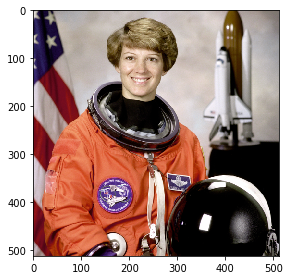

In [11]:
imshow(image)

In [5]:
from skimage.filters import gaussian

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


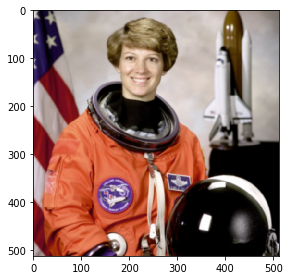

In [12]:
filtered_img = gaussian(image, sigma=1, multichannel=True)
imshow(filtered_img)

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


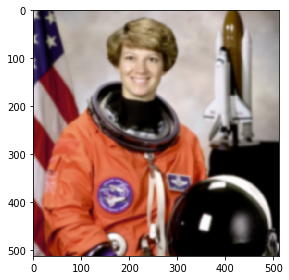

In [13]:
filtered_img = gaussian(image, sigma=2, multichannel=True)
imshow(filtered_img)

## Blur only an area of the image

In [17]:
image.shape

(512, 512, 3)

In [71]:
def blur(image, x0, x1, y0, y1, sigma=1, imshowall=False):
    x0, x1 = min(x0, x1), max(x0, x1)
    y0, y1 = min(y0, y1), max(y0, y1)
    im = image.copy()
    sub_im = im[x0:x1,y0:y1].copy()
    if imshowall: imshow(sub_im)
    blur_sub_im = gaussian(sub_im, sigma=sigma)
    if imshowall: imshow(blur_sub_im)
    blur_sub_im = np.round(255 * blur_sub_im)
    im[x0:x1,y0:y1] = blur_sub_im
    return im

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


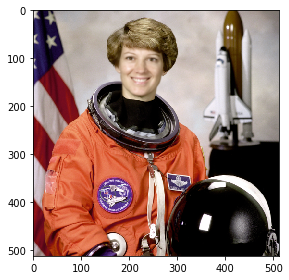

In [72]:
filtered_img = blur(image, 80, 180, 170, 270, sigma=1)
imshow(filtered_img)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


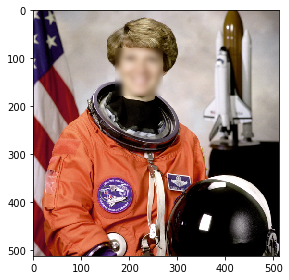

In [76]:
filtered_img = blur(image, 80, 180, 170, 270, sigma=5)
imshow(filtered_img)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


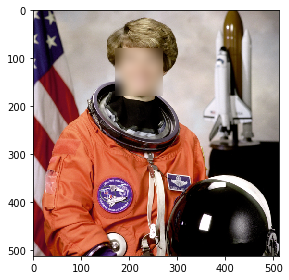

In [73]:
filtered_img = blur(image, 80, 180, 170, 270, sigma=10)
imshow(filtered_img)

/usr/local/lib/python3.6/dist-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))
/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


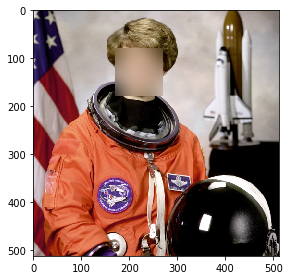

In [74]:
filtered_img = blur(image, 80, 180, 170, 270, sigma=20)
imshow(filtered_img)

## Conclusion

That's it.